In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

# Basic machine learning workflow

Refer back to **4-2_Machine-Learning-Review.pdf** to review your key terms. Below is a simplified workflow:

1. Do you want to predict something? 
    - Yes = supervised learning (y ~ x)
    - No = unsupervised learning (~ x)
2. If supervised:
    - Syntax looks like this: **y ~ x** ([use x to predict y](https://stats.stackexchange.com/questions/207425/why-do-we-say-the-outcome-variable-is-regressed-on-the-predictors))
    - **y** is the thing we want to predict! (dependent/target/outcome variable)
    - **x** is the thing(s) we use to do the predicting (independent/predictor/input variable)
3. If supervised:
    - perform **regression** if the **y** variable is continuous
    - perform **classification** if the **y** variable is discrete/categorical
4. If unsupervised: 
    - Syntax looks like this: **~ x**
    - We only have **x** variables, and we want to see how they sort on their own accord without trying to predict anything.
5. Handle missing data
    - Missing data should be handled somehow. [Listwise deletion](https://en.wikipedia.org/wiki/Listwise_deletion) is common but not preferred because of the amount of information that is lost. [Mean imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)#Mean_substitution) is also used but is sensitive to outliers. [Median imputation](https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median) is often reliable and interpretable. [Generalized low rank models](https://web.stanford.edu/~boyd/papers/pdf/glrm.pdf) are preferred! 
6. Convert categorical variables to indicators
    - Use [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) to your advantage! Most supervised algorithms handle factor/categorical data poorly (decision trees being a main exception). 
7. Split the data
    - [Split the original dataset](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) so that (arbitrarily) 70% is assigned to the **training set** and the remaining 30% to the **test set**. 
        - Use [random sampling]() if you are splitting continuous data. 
        - Use [stratified](https://en.wikipedia.org/wiki/Stratified_sampling) [sampling](https://www.investopedia.com/ask/answers/032615/what-are-some-examples-stratified-random-sampling.asp#:~:text=Stratified%20random%20sampling%20divides%20a,of%20the%20groups%20or%20strata.&text=Stratified%20random%20sampling%20is%20a%20method%20of%20sampling%2C%20which%20is,a%20sample%20size%20for%20study.) if you are splitting categorical data. 
    - [Data splitting](https://www.mff.cuni.cz/veda/konference/wds/proc/pdf10/WDS10_105_i1_Reitermanova.pdf) is a fundamental preprocessing step! 
    - [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is even better because it repeats this splitting _k_ number of times.
8. Fit the model to the training set and evaluate its performance. 
    - Fit the data to the training set so it can "learn" the relationships between the **x and y** variables. 
    - Then use a [performance](https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce) [metric](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) to see how well the model fit the data. 
    - What is a [loss](https://en.wikipedia.org/wiki/Loss_functions_for_classification) [function](https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f)?
    - The model is **underfit** if the model performs poorly on the training dataset. 
9. Fit the data to the test set and evaluate its performance
    - See how well the model performs on the test set; hopefully we see roughly similar performances for the training and test sets. 
    - The model is **overfit** if the model performs poorly on the training dataset but poorly on the test dataset. 

# The value of understanding simple linear regression

Doing a simple [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) regression step-by-step provides a way to understand the supervised machine learning process. 

> NOTE: Remember to [learn the assumptions of linear or logistic regression (or any other statistical test)](https://www.lexjansen.com/wuss/2018/130_Final_Paper_PDF.pdf) before using it! 

### 1. Generate some data

First, let's generate toy predictor x and response y variables and compute their means. This will be our "training set":

In [3]:
# Generate toy predictor (x) and response (y) variables
x = np.array([1, 1.5, 4, 7])
y = np.array([4, 3, 8.2, 9])

# Convert to data frame
df = pd.DataFrame({"x": x,
                   "y": y})
df

,x,y
0,1.0,4.0
1,1.5,3.0
2,4.0,8.2
3,7.0,9.0


### 2. Calculate means of x and y

In [4]:
mean_x = round(sum(df.x) / len(df.x), 2)
mean_y = round(sum(df.y) / len(df.y), 2)
print("mean of x is:", mean_x)
print("mean of y is:", mean_y)

mean of x is: 3.38
mean of y is: 6.05


### 3. Plot the data

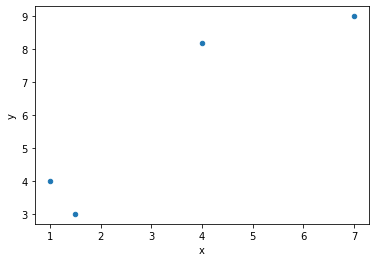

In [5]:
df.plot.scatter(x = "x", y = "y", 
               figsize = (6,4));

### 4. Calculate the error for each observation

Numpy allows us to perform "vectorized" operations, such as subtracting the mean of x from each x value or the mean of y from each y value. That is, we can do math on arrays of numbers simultaneously: 

In [6]:
print("Point errors for x is:", x - mean_x)
print("Point errors for y is:", y - mean_y)

Point errors for x is: [-2.38 -1.88  0.62  3.62]
Point errors for y is: [-2.05 -3.05  2.15  2.95]


### 5. Calculate the beta coefficients

Error is important bcause it helps us calculate the [beta coefficeints](https://en.wikipedia.org/wiki/Standardized_coefficient) to plot the slope and intercept of the best fit line, which minimizes the sum of the squared errors (the vertical distances between each point and the line).

In [7]:
## Estimate the B1 coefficient (slope)
B1 = sum((x - mean_x) * (y-mean_y)) / sum((x - mean_x) **2)
print("slope (B1) is equal to", round(B1, 5))

## Estimate B0 coefficient (intercept)
B0 = mean_y - (B1 * mean_x)
print("intercept (B0) is equal to", round(B0, 5))

slope (B1) is equal to 0.99724
intercept (B0) is equal to 2.67933


### 6. Plot the best fit line

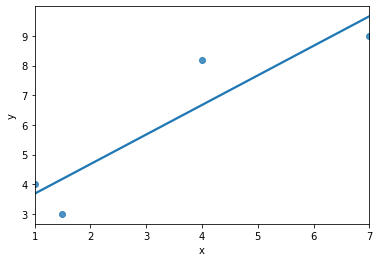

In [8]:
sns.regplot(x = "x", y = "y", 
            data = df, 
            ci = None); 
            # ci = 95)

### 7. Generate predicted values

Now that we have calculated the best fit line, we can generate predicted values (our "test set") and assess the performance of the model.

In [9]:
# Generate predicted y values by plugging our x values into the equation
y_hat = B0 + B1 * x
print("The actual y values are:", y)
print()
print("The predicted y values are:", y_hat)

The actual y values are: [4.  3.  8.2 9. ]

The predicted y values are: [3.67656694 4.17518733 6.66828929 9.66001164]


### 8. Evaluate performance

Our performance metric will be [root mean square error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation), or the standard deviation of the residuals (aka prediction errors). Error is measured as the vertical distance from a data point to the best fit line. 

However, we have to do some calculations first before we get to RMSE! 

In [10]:
# First, calculate the error for each observation by subracting the predicted value from it:
Y_error = y - y_hat
print(Y_error)

[ 0.32343306 -1.17518733  1.53171071 -0.66001164]


In [11]:
## Second, calculate the square of each of these errors:
Y_error_sq = Y_error ** 2
print(Y_error_sq)

[0.10460895 1.38106525 2.34613771 0.43561536]


In [12]:
## Third, sum these values
sum_squared_error = sum(Y_error_sq)
print(sum_squared_error)

4.267427273047831


In [13]:
## Fourth, calculate the RMSE - take the square root of the summed squared error divided by the length of Y:
RMSE = math.sqrt(sum_squared_error / len(y))
print(round(RMSE, 5))

1.03289


### 9. How did we do? 

Compare the slope and intercept from `stats.linregress` to our estimations by hand. Are they the same? 

In [14]:
lin_mod = scipy.stats.linregress(x, y)
lin_mod

LinregressResult(slope=0.9972451790633609, intercept=2.684297520661157, rvalue=0.9170329283008835, pvalue=0.08296707169911656, stderr=0.30666886418034517)

Now calculate RMSE from the `sklearn.metrics.mean_squared_error` function to compare to our estimations by hand. How did we do? 

In [16]:
# Neat! Same thing! 
math.sqrt(metrics.mean_squared_error(y, y_hat))

1.0328876116315646

1. What does each point represent in the graphs? 
2. What does the best fit line represent? 
3. What is the name of the distance between each point and the line? 
4. What does RMSE tell us? 

# Logistic regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) provides a useful way to classify text. Don't be fooled, however - even though it has _regression_ in its name know that it can perform both both regression and classification. That is to say that the **y** variable can be either continuous or categorical. First, create some toy data:

In [17]:
study = pd.DataFrame({'Study_Hours' : [2.0, 6.9, 1.6, 9.8, 1.1, 5.8, 3.4, 8.5, 6.7, 1.6, 8.6, 3.4, 9.4, 5.6, 12.0, 3.2, 3.5, 6, 9.7, 6.5],
                      'Grade' : [60.0, 83.6, 35.4, 79.2, 42.4, 98.2, 67.6, 84.0, 93.8, 64.4, 100.0, 61.6, 100.0, 69.4, 98.4, 41.8, 72.0, 59.0, 90.8, 100.0],
                      'Pass' : [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]})
study

,Study_Hours,Grade,Pass
0,2.0,60.0,1
1,6.9,83.6,1
2,1.6,35.4,0
3,9.8,79.2,1
4,1.1,42.4,0
5,5.8,98.2,1
6,3.4,67.6,1
7,8.5,84.0,1
8,6.7,93.8,1
9,1.6,64.4,0


### Plot the data

Linear regression, in its simple form, tries to model the relationship between two continous variables as a straight line. It interprets one variable as the input (x), and the other as the output y:

LinregressResult(slope=5.1810481614631625, intercept=45.21125734916487, rvalue=0.7937389178475398, pvalue=2.9524509403108776e-05, stderr=0.9358192263830523)


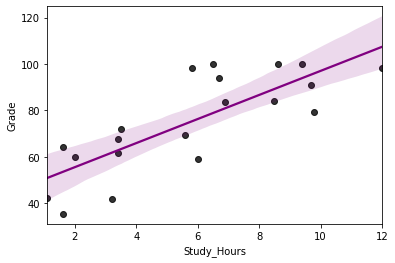

In [18]:
sns.regplot(x = "Study_Hours", y = "Grade", 
            data = study, color = "k",
            line_kws={'color':'purple'});
print(stats.linregress(x = study.Study_Hours, y = study.Grade))

# Intuiting the Logistic Regression Model

But what happens if your **y** variable is categorical and not continuous? Suppose we don't care about the `Grade` score, but we just care if you pass the course or not?

0 = no pass  
1 = pass

> NOTE: Recall that logistic regression can perform both regression and classification depending on the distribution of the y variable. For classification, we are interested in the _class probabilities_ of a 1 or a 0 at some threshold, for example: < 0.5 (for 0) and >= 0.5 (for 1).

In [19]:
study.head()

,Study_Hours,Grade,Pass
0,2.0,60.0,1
1,6.9,83.6,1
2,1.6,35.4,0
3,9.8,79.2,1
4,1.1,42.4,0


How would we fit a line to that? That's where the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) can be handy. The general logistic function is:

$ f(x) = \frac{1}{1 + e^{-x}} $

# The `LogisticRegression` function

Let's go back to `sklearn` and save our logistic model in a variable named `lr`:

In [20]:
lr = LogisticRegression(solver = "liblinear")

We'll `reshape` our arrays since scikit-learn prefers them in a specified format.

In [21]:
x = np.array(study['Study_Hours']).reshape(-1,1)
y = np.array(study['Pass']).reshape(len(study['Pass']),)
x, y

(array([[ 2. ],
        [ 6.9],
        [ 1.6],
        [ 9.8],
        [ 1.1],
        [ 5.8],
        [ 3.4],
        [ 8.5],
        [ 6.7],
        [ 1.6],
        [ 8.6],
        [ 3.4],
        [ 9.4],
        [ 5.6],
        [12. ],
        [ 3.2],
        [ 3.5],
        [ 6. ],
        [ 9.7],
        [ 6.5]]),
 array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]))

We can use the `fit` function again on our `x` and `y`:

In [22]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Plot!

/Users/brooks/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/Users/brooks/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/brooks/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


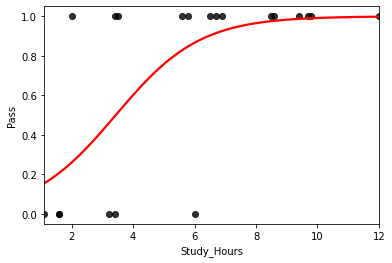

In [23]:
sns.regplot(x = study.Study_Hours, y = study.Pass, 
            logistic = True, 
            color = "k",
            line_kws={'color':'red'});

In [24]:
# 14/20 = 0.80
lr.score(x, y)

0.8

# Train/test split

Well, let's see how the logistic regression performs on training and test set data. 

In [25]:
# Define x and y variables for training and test sets. Split the data! 
x_train, x_test, y_train, y_test = train_test_split(
    # Which dataset? 
    study, 
    
    # What is the outcome variable?
    study.Pass, 
    
    # How much data should be assigned to the test set? 
    # 1 minus this number will be automatically assigned to the training set
    test_size = 0.30, 
    
    # Ensure we get the same train/test split each time
    random_state = 3)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

In [26]:
# Use default settings except for the solver!
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
logistreg = LogisticRegression(solver = "liblinear")
logistreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# Fit the model to the training data
logistreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Training set classification accuracy: 0.857

In [28]:
# Calculate classification accuracy on the training set
# Nice! 
logistreg.score(x_train, y_train)

0.8571428571428571

In [29]:
# Generate predicted y values based on the x test set data
predictions = logistreg.predict(x_test)
predictions

array([1, 0, 1, 1, 0, 1])

### Test set classification accuracy: 0.833

In [30]:
# Calculate classification accuracy on the test set
score = logistreg.score(x_test, y_test)
print(score)

0.8333333333333334


In [31]:
# Create a confusion matrix: https://en.wikipedia.org/wiki/Confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[2 1]
 [0 3]]


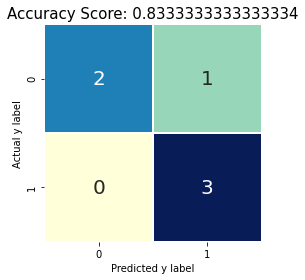

In [32]:
# Fancy it up! Use plt.savefig() to export
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = ".0f", 
            cbar = False, linewidths = 2, 
            square = True, cmap = 'YlGnBu', annot_kws={"size": 20})
plt.ylabel('Actual y label')
plt.xlabel('Predicted y label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Other algorithms

This is the gist! Download the [Machine Learning in Python](https://github.com/dlab-berkeley/python-machine-learning) materials to see how other algorithms work. 

    - What's up with tree-based methods? 
    - What is a random forest? 
    - How do their accuracy scores compare to our logistic regression? 
    - What is AUC and is it better than simple accuracy?